<a href="https://colab.research.google.com/github/georgiasilvabs/Botao_animado/blob/main/Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
 # Pacotes analise de dados
 import pandas as pd

In [3]:
import pandas_datareader.data as web
import numpy as np

# Analises graficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Funçao para data
from datetime import datetime

#YFiance
import yfinance as yf
yf.pdr_override()

#Avisos 
import warnings
warnings.filterwarnings('ignore')

API Yahoo Finance 
o yfinance oferece uma maneira segmentada e Pythonic de baixar dados de mercado do Yahoo! finanças.

In [4]:
Dados = web.get_data_yahoo( 'PETR4.SA', period= '1y')

# Shape 
Dados.shape 

[*********************100%***********************]  1 of 1 completed


(252, 6)

In [5]:
# Verificando primeiros registros
Dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-08,31.900000,31.950001,31.260000,31.830000,18.601572,62590000
2022-02-09,31.740000,32.689999,31.650000,31.950001,18.671701,50960500
2022-02-10,32.299999,32.900002,31.940001,32.439999,18.958057,49534600
2022-02-11,32.770000,33.910000,32.630001,33.759998,19.729469,88013400
2022-02-14,33.860001,33.939999,32.820000,33.000000,19.285326,55687000


In [6]:
# Ultimo registros
Dados.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-02,25.510000,25.809999,24.420000,24.520000,24.520000,83823000
2023-02-03,24.540001,25.379999,24.420000,24.790001,24.790001,71170700
2023-02-06,24.870001,25.870001,24.750000,25.780001,25.780001,82794500
2023-02-07,25.910000,26.139999,25.459999,25.620001,25.620001,55311800
2023-02-08,25.799999,26.040001,25.559999,25.620001,25.620001,27867300


In [7]:
# Estatisticas descritivas
Dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,29.982262,30.521905,29.439365,29.994405,23.332139,8.192361e+07
std,3.650480,3.669101,3.612010,3.640038,3.546083,3.686270e+07
min,21.000000,22.110001,20.770000,21.469999,17.537956,2.786730e+07
25%,27.082500,27.592500,26.332500,26.990000,20.002680,5.629405e+07
50%,30.820000,31.389999,30.300000,30.655000,23.106971,7.285520e+07
75%,32.717501,33.507500,32.382501,32.967500,25.987275,9.630120e+07
max,37.650002,38.389999,36.849998,37.720001,33.003029,3.195016e+08


In [8]:
# Informações
Dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-08 to 2023-02-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Média móvel

A média Móvel é um indicador que faz parte da Análise Técnica de ações. Com ela, é possivel identificar o equilíbrio dos preços no mercado, observando tendências de alta, neutra ou baixa. A representação gráfica das médias móveis é normalmente feita por uma linha, que se movimenta conforme os dados novos recebidos para cálculo.  


O que é média móvel?

A média móvel é um indicador importante que suaviza os dados dos preços das ações para formar um indicador que segue a tendência. 


E como fazer esse cálculo?

Basta utilizar a fórmula: MMA = Soma dos preços de fechamento + Número de dias


EX: Considere a média móvel aritmética de 5 dias e sua evolução ao longo de 3 dias, em que os preços diários de fechamento são?
11,12,13,14,15,16 e 17.

Primerio dia da MMA de 5 dias: (11 + 12 + 13 + 14 + 15) / 5 = 13

Segundo dia  da MMA de 5 dias: (12 + 13 + 14 + 15 + 16) / 5 = 14

Terceiro dia da MMA de 5 dias: (13 + 14 + 15 + 16 + 17) / 5 = 15 


In [9]:
# Media Simples
Lista = [11, 12, 13, 15, 16,17 ]

from statistics import mean as Media
print (f'media: { Media(Lista) }')

media: 14


In [10]:
Media( Lista )

14

In [11]:
#Periodo da média móvel

n =5 

for Intervalo in range(3):
  print(f'{Intervalo} Dia: {sum(Lista[Intervalo:n]) /5 }')

0 Dia: 13.4
1 Dia: 11.2
2 Dia: 8.8


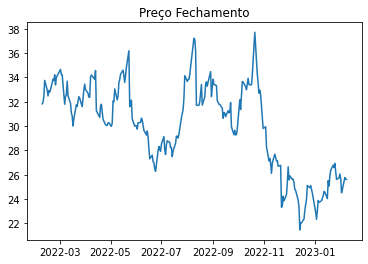

In [12]:
# Plot
plt.plot( Dados['Close'])
plt.title('Preço Fechamento');


Função Rolling 
A função rolling() é uma função do pandas que permite calcular estatíticas em janelas deslizantes de dados.

Ela é muito útil para calculos médias móveis, deslios padrões, somatórios, mínimos e máximos, entre outras estatísticas.

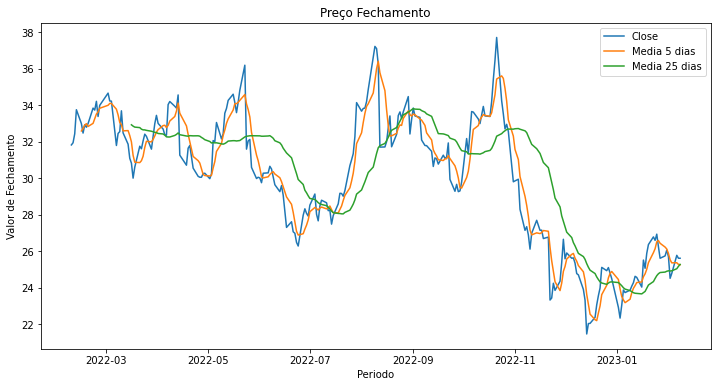

In [13]:
Periodo = 5
Dados['Close'].rolling(window= Periodo).mean()

#tamanho da imagem
plt.figure (figsize=(12, 6))
plt.plot( Dados['Close'])
plt.plot( Dados['Close'].rolling(window= Periodo).mean() )
plt.plot( Dados['Close'].rolling(window= Periodo + 20 ).mean() )
plt.title('Preço Fechamento');
#legenda
plt.legend(['Close', 'Media 5 dias', 'Media 25 dias'])
plt.ylabel('Valor de Fechamento')
plt.xlabel('Periodo');

**Plotly**

O PLOTLY é uma biblioteca Python de plotagem interativa e de código aberto que oferece suporte a mais de 40 tipos de gráficos exclusivos, abrangendo uma ampla variedade de casos de uso estatísticos, financeiros, geográficos, científicos e tridimensionais.

plotly.express (px) é uma maneira rápida e fácil de criar visualizações dinâmicas de dados.
plotly.graph_objects (go) é a API de nível inferior que concede mais controle sobre suas visualizações, mas é mais intensiva em código.


In [14]:
Periodo = 5
Dados['Media_Movel'] = Dados['Close'].rolling( window=Periodo ).mean()

Figure = px.line(
    Dados,
    y='Close',
    title='Fechamento'
)

Figure.show()

In [15]:
Figure_02 = go.Figure(
    data= go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        line= (dict(color='firebrick', width=3))
    )
)

Figure_02.update_layout(
    title= 'Análise de Fechamento',
    xaxis_title= 'Periodo',
    yaxis_title= 'Fechamento'
)
Figure_02.show()

**Candlestick Charts**

É um estilo de gráfico financeiro que descreve abertura, alta, baixa e fechamento para uma determinada xcoordenada (tempo mais provável). As caixas representam a dispersão entre os valores opene closee as linhas representam a dispersão entre os valores lowe high. Pontos de amostragem onde o valor de fechamento é maior (inferior) do que o valor de abertura são chamados de crescentes (decrescentes). Por padrão, as velas crescentes são desenhadas em verde, enquanto as decrescentes são desenhadas em vermelho.


In [16]:
#Grafico candlestick
Grafico_Candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=Dados.index,
            open=Dados['Open'],
            high=Dados['High'],
            low=Dados['Low'],
            close=Dados['Close'],
            increasing_line_color='green',
            decreasing_line_color='gray'
        )
    ]
)

Grafico_Candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Analise Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de Fechamento'
)

Grafico_Candlestick.show()

Criando relatorio

In [17]:
 #Criar a Figura
 Figura = make_subplots(
     rows=2,
     cols=1,
     specs=[
         [{'type':'scatter'}],
         [{'type':'scatter'}]
     ],
      vertical_spacing=0.075,
      shared_xaxes= True,
         subplot_titles=('Cotação', 'Fechamento')
 )

# Layout e Dimensão
Figura.update_layout(
    width=1000,
    height=800,
    title_text='<b>Advanced Analytics</b> <br>Follow-up Petrobras'
)

#Adicionar gráfico na primera posição
Figura.add_trace(
     go.Candlestick(
            x=Dados.index,
            open=Dados['Open'],
            high=Dados['High'],
            low=Dados['Low'],
            close=Dados['Close'],
            increasing_line_color='red',
            decreasing_line_color='green'
        ),
        row=1, col=1
)
Figura.update_layout(
    xaxis_rangeslider_visible=False
)

#Adicionar gráfico na segunda posição
Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='green')
    ),
    row=2, col=1
)

Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='blue')
    ),
    row=2, col=1
)

Figura.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict( size=10) 
    )
)

Figura.add_annotation(
    showarrow=False,
    text='Análise feita no evento de Python',
    font=dict(size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Figura.add_annotation(
    showarrow=False,
    text='Por: Georgia Silva',
    font=dict(size=10),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

 Figura.show()

Exportar PDF 

Kaleido

Kaleido é uma biblioteca de plataforma cruzada para geração de imagens estáticas (por exemplo, png, svg, pdf, etc.) para bibliotecas de visualização baseadas na web, com foco particular na eliminação de dependências externas. O foco inicial do projeto é a exportação de imagens plotly.js do Python para uso por plotly.py, mas ele foi projetado para ser relativamente direto para estender a outras bibliotecas de visualização baseadas na web e outras linguagens de programação. O foco principal do Kaleido (pelo menos inicialmente) é servir como uma dependência de bibliotecas de visualização baseadas na web, como plotly.py. Como tal, o foco está em fornecer uma API programática, em vez de amigável ao usuário.

In [18]:
#!pip install -U kaleido

In [21]:
Figura.write_image('Report_Financeiro.pdf')